## LBVAR Asymmetry

In [1]:
# 설치 없이 상태경로로 모듈을 가져오는 부분입니다
import sys
import os
parent_dir = os.path.abspath("../")
sys.path.append(parent_dir)

import bok_da

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import bok_da

In [3]:
# # large 데이터 로드
df = pd.read_excel("../data/Differed_Data.xlsx", index_col=0) ##

# 일부 컬럼만 사용 (138개 중)
col_limit = 10
df = df.iloc[:, :col_limit]

df.head()

,Nominal_GDP,Nominal_GDI,Nominal_GNI,Private_Expenditure,Total_Fixed_Capital,I_Agriculture,I_Cultivation,I_Livestock,I_Forestry,I_Fishing
Time,,,,,,,,,,
2000-06-01,1.502927,1.358106,1.696707,0.074624,0.336491,-0.594326,-3.403336,-30.766764,9.261067,4.133994
2000-09-01,2.358037,1.387265,1.923136,0.959201,0.143881,0.869401,3.912006,13.369825,-11.070223,-5.372553
2000-12-01,-1.238687,-4.506357,-1.016552,0.866758,-6.624512,-2.483600,-3.892810,-2.218035,-1.894769,-11.767584
2001-03-01,1.521727,1.537304,1.435378,1.147073,4.043769,-7.536891,-4.474478,7.593760,-3.121609,-7.231986
2001-06-01,1.370596,0.008295,1.651308,2.252884,-0.211147,9.271709,4.438595,-0.958753,3.393123,11.205949


In [4]:
from bok_da.ts.lbvar import LBVAR_Asymmetry

model = LBVAR_Asymmetry(p=4, ndraws=10000, verbose=True, hyperparameter_opt="mcmc", optimization_method=0)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Hyperparameter Optimization: 2
  - Optimization Method: 0
  - Verbose: True


In [5]:
model.fit(df)

> Optimizing objective function using scipy Optimization Method
> Optimized Hyperparameters are [2.1000e-02 0.0000e+00 9.5004e+01]
> Hyperparameter Optimization Start


Hyperparameter MCMC: 100%|██████████| 10000/10000 [05:28<00:00, 30.43it/s]


> Hyperparameter Optimization Clear
> Opt Hyperparameters are [2.000e-02 1.000e-03 9.444e+01]
> Prior Making (Asymmetric)
> Posterior Draw (Asymmetric)


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


In [6]:
model.Draw.variable_summary()

added | variable     | type    |   size(KB) | info
-------------------------------------------------------
    1 | theta_is     | ndarray |      0.188 | shape=(10,)
    2 | Sigma_i_sq   | ndarray |    781.375 | shape=(10000, 10)
    3 | A_matrix     | ndarray |      0.141 | shape=(10, 10, 10000)
    4 | Bet          | ndarray |  32031.391 | shape=(10, 41, 10000)
    5 | Sigma_struct | ndarray |   7812.641 | shape=(10, 10, 10000)
    6 | Sigma        | ndarray |   7812.641 | shape=(10, 10, 10000)


In [7]:
forecast_results = model.forecast(forecast_period=4)

# 예측 결과 확인
print(forecast_results.Mean)

> Forecast Start


100%|██████████| 10000/10000 [00:01<00:00, 6893.60it/s]

[[ 0.7220508   0.28182512  0.66299999  0.50496563  0.92212689 -0.26307305
  -1.30207313  7.23314482 -2.06660372  0.67347786]
 [ 0.73546699  0.19765453  0.80950882  0.5909088   0.76165734  0.53255673
   0.11769622  1.42176089  1.29662678 -1.80021891]
 [ 0.75717166  0.20080585  0.77271711  0.58095976  0.80453921 -0.04982645
  -0.16250255 -0.31615402 -0.06972858  1.08606146]
 [ 0.74864067  0.21341943  0.77938356  0.64796234  0.80351963  0.08483905
   0.07974395 -1.90829726  0.07719163 -1.22710414]]


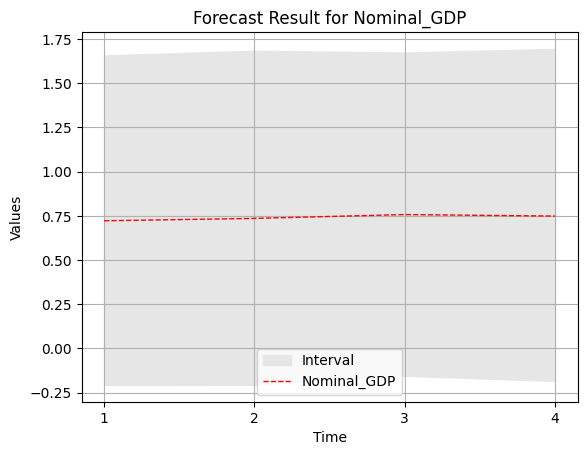

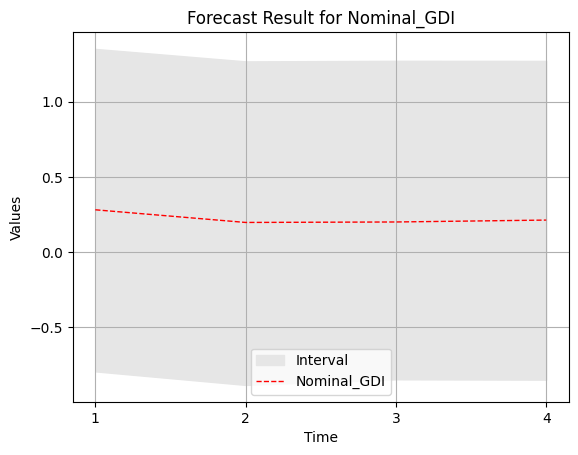

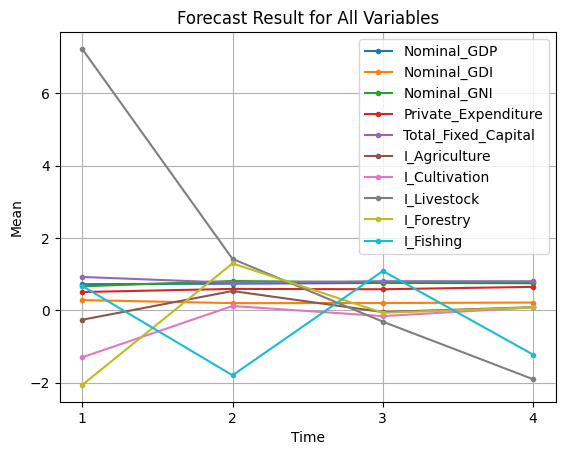

In [8]:
model.print_forecast(plot_index=[1, 2], column_names=df.columns)